In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#INPUT PARAMETERS - all distance measurements are in mm, all angles are in radians

#Telescope
D_T=500 #diameter
F_T=6.8 #focal ratio
FOV_X=((.175*(np.pi/180))*.25); FOV_Y=((.233*(np.pi/180))*.33) #effective field of view 
R=1000 #resolving power

#DMD
p_M=.0137 #mirror pitch
NM_X=750; NM_Y=1000 #number of mirrors in x and y dimensions
N_m1=2 #mirrors per slit in each dimension

#Grating
G=600 #grooves/mm

#Detector
p_D=.0065 #pixel pitch
ND_X=2000; ND_Y=2000
S_D=.82 #plate scale of Detector

#wavelengths
λ_c=.00055 #central
λ_max=.0007 #maximum
λ_min=.0004 #minimum

In [5]:
#TELESCOPE OUTPUTS

f_T=F_T*D_T #focal length
S_TX=2*f_T*np.tan(FOV_X/2); S_TY=2*f_T*np.tan(FOV_Y/2) #effective image size on telescope focal plane

In [63]:
#RELAY OPTICS OUTPUTS

M_R=(NM_X*p_M)/S_TX #magnification of relay optics
F_R=M_R*F_T #focal ratio

In [6]:
#SPECTROGRAPH OUTPUTS 

F_col=F_T #focal ratio of collimator
N_m1=2 #mirrors per slit in each dimension
N_p1=S_M/S_D #pixels per mirror
M_S=(p_D/p_M)*N_p1 #magnification of spectrograph
F_cam=M_S*F_col #focal ratio of camera

λ_range=λ_max-λ_min #spectral range
Δλ=λ_c/R #spectral resolution
BP=round(λ_range/Δλ) #number of bandpasses per spectrum

Spec1=int(2*BP) #estimated number of pixels per spectra on detector

In [19]:
def plot(array):
    """This function is a shortcut for plotting figures"""
    plt.figure(figsize=(6,6))
    plt.imshow(array.T,extent=[0,ND_X,0,ND_Y], cmap='magma')
   # plt.colorbar()
    plt.show()

In [8]:
#Plot guide for generating image of detector, projected DMD and spectra

c_m=.1 #color value of DMD
c_s=1 #color value of spectra

In [17]:
def spectra(m_x,m_y):
    """This function takes mirror coordinates from (1,1) to (NM_X,NM_Y) and assigns the detector pixel
    values of the corresponding spectrum the color value of c_s. Here we are assuming that every spectrum
    is the same length, which is only an approximation
    """
    _dx=int(_dmdx+((N_p1*m_x))); dx_=int(_dx+(2*N_p1))
    _dy=int(_dmdy+((N_p1*m_y))); dy_=int(_dy+(2*N_p1))
    _s=int(_dx-((Spec1/2)-1)); s_=int(_dx+((Spec1/2)+1))
    
    if _s<0:
        _s=0
    if s_>=ND_X:
        s_=ND_X
    
    for x in range(_s,s_):
        for y in range(_dy,dy_):
            data[x][ND_Y-y]=c_s

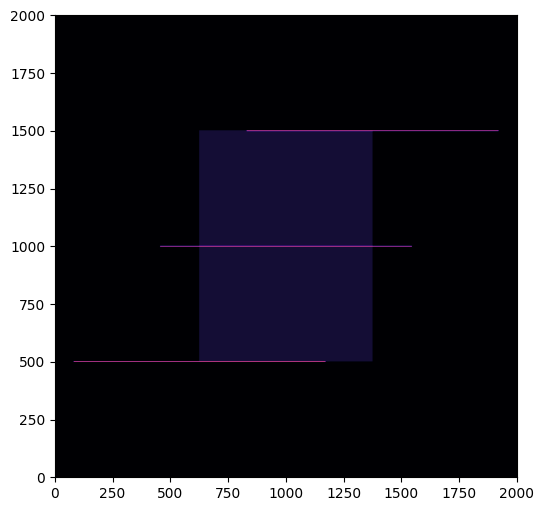

In [18]:
#Reseting empty plot of detector and projected DMD
data=np.zeros((ND_X,ND_Y))
_dmdx=int((ND_X-(N_p1*NM_X))/2)-1; dmdx_=int(ND_X-((ND_X-(N_p1*NM_X))/2))
_dmdy=int((ND_Y-(N_p1*NM_Y))/2)-1; dmdy_=int(ND_Y-((ND_Y-(N_p1*NM_Y))/2))

for x in range(_dmdx,dmdx_):
    for y in range(_dmdy,dmdy_):
        data[x][y]=c_m

#Plotting the center and corner spectra using the spectra function defined above
spectra(375,500); spectra(1,1); spectra(750,1000)
plot(data)